# Analysis and plot mice weight in ELS experiments
* GT 5/5/2022
* 2/23/2023 adding Carla's mice. no, this is not the best idea bc carla did not weigh them before the SEFL. Let's leave this (mostly) as is and make a new one for all the mice. It used to be 46 mice but now i can't see more than 42. I also resaved the figures. 

In [1]:
import sys
from os.path import join
from datetime import date 

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_context('talk')

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
sys.path.append('/gdrive/Shareddrives/Turi_lab/Data/PTSD_project/!analysis/code/')
import core

In [4]:
save_data_dir = '/gdrive/Shareddrives/Turi_lab/Data/PTSD_project/!analysis/saveFolder/ELS/data'
save_fig_dir = '/gdrive/Shareddrives/Turi_lab/Data/PTSD_project/!analysis/saveFolder/ELS/figures'

In [ ]:
!pip install pingouin

In [10]:
# specifying the workbook
# worksheet = gc.open('11.2 Weight Log').sheet1
drive = core.googleDrive()
data = core.googleDrive.load_spreadsheet_data(drive, 'ELS/SEFL Mice',
                                                   'All mice (5_4_22_GT)')
# replacing empty cells with NaN-s
data = data.replace(r'^\s*$', np.NaN, regex=True)

# assigning correct datatypes to columns
data[['P4 Weight',
      'P11 Weight',
      'P21 Weight',
      '17 Weeks Weight']] = data[['P4 Weight',
      'P11 Weight',
      'P21 Weight',
      '17 Weeks Weight']].astype(float)

In [15]:
data.head(3)

,id,id_ears (2/15),cage_number,cage_number_updated_11_19,Condition (ELS+/-),sex,SEFL,sire,dam geotype,sire genotype,...,p21_date,survival status,17 Weeks Weight,,,,sefl_weight,sefl_date(20wk),notes (updated 2/14),ear punches (2/15)
1,100971_1,1,100927,100927,No ELS,male,Control,NaN,NaN,NaN,...,11/11/2021,alive,30.6,NaN,NaN,NaN,NaN,2/24/2022,Relabelled w/ ear,1
2,100971_2,2,100927,100927,No ELS,male,Control,NaN,NaN,NaN,...,11/11/2021,alive,29.0,NaN,NaN,NaN,NaN,2/24/2022,Relabelled w/ ear,2
3,100971_3,3,100927,100927,No ELS,male,Control,NaN,NaN,NaN,...,11/11/2021,alive,29.1,NaN,NaN,NaN,NaN,2/24/2022,NaN,3


In [32]:
data.groupby(['Condition (ELS+/-)'])['id'].nunique()

Condition (ELS+/-)
ELS       32
No ELS    10
Name: id, dtype: int64

In [16]:
df_melted = pd.melt(data, id_vars=['Condition (ELS+/-)', 'id', 'SEFL'],
                    value_vars=['P11 Weight', 'P21 Weight', '17 Weeks Weight'],
                    var_name='age', value_name='Weight (g)')
df_melted

,Condition (ELS+/-),id,SEFL,age,Weight (g)
0,No ELS,100971_1,Control,P11 Weight,6.0
1,No ELS,100971_2,Control,P11 Weight,5.4
2,No ELS,100971_3,Control,P11 Weight,5.9
3,No ELS,100978_2,Control,P11 Weight,5.6
4,No ELS,100978_3,Control,P11 Weight,6.1
...,...,...,...,...,...
121,ELS,SOM-82,SEFL,17 Weeks Weight,19.3
122,ELS,SOM-84,SEFL,17 Weeks Weight,19.5
123,ELS,SOM-91,SEFL,17 Weeks Weight,23.3
124,ELS,SOM-95,SEFL,17 Weeks Weight,21.6


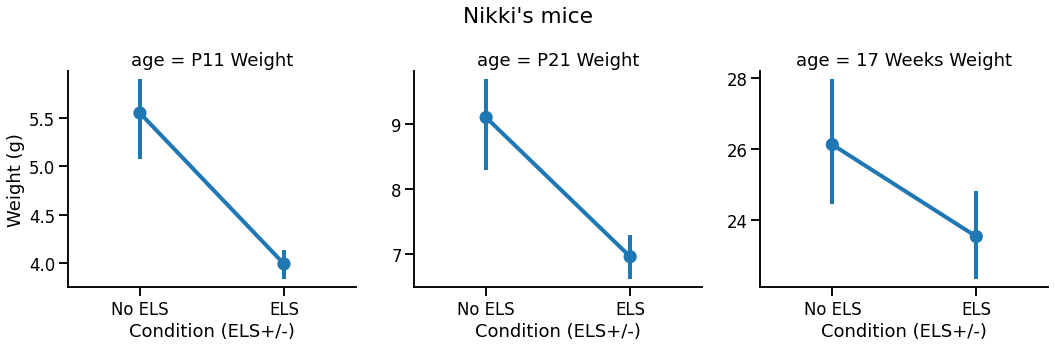

In [26]:
g = sns.catplot(data=df_melted, x='Condition (ELS+/-)',
               y='Weight (g)', col='age', kind='point', sharey=False)
num_mice = df_melted['id'].nunique()
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Nikki's mice")
g.fig.savefig(join(save_fig_dir, f"Weights Across Time Points_{date.today()}.png"),
            transparent=False, dpi=300, bbox_inches="tight")

# plt.savefig(join(save_fig_dir, f"Weights Across Time Points 5_5_{date.today()}.png"),
#             transparent=True, dpi=300, bbox_inches="tight")

In [ ]:
# BW on the day of separation
g = sns.boxplot(data=data, x="Condition (ELS+/-)", y="P4 Weight")
num_mice = data['id'].nunique()
gplot = sns.stripplot(x="Condition (ELS+/-)", y="P4 Weight",
              jitter=True,
              dodge=True,
              alpha=.8,
              color='grey',
              edgecolor='k',
              data=data)

# remove redundant legends in Python
# Let us first get legend information from the plot object
handles, labels = gplot.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:2], labels[0:2])
plt.title(f'mice = {num_mice}')
sns.despine()
# plt.savefig(join(save_fig_dir, f"NS_P4 weights_{date.today()}.png"), transparent=False,
#             dpi=300, bbox_inches="tight")

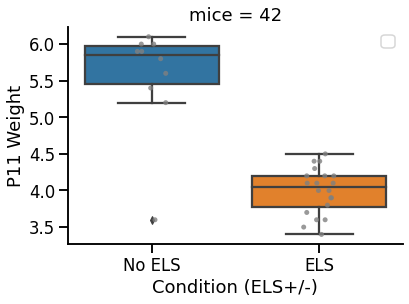

In [42]:
# BW after ELS
g = sns.boxplot(x="Condition (ELS+/-)", y="P11 Weight", data=data)
gplot = sns.stripplot(x="Condition (ELS+/-)", y="P11 Weight",
              jitter=True,
              dodge=True,
              alpha=.8,
              color='grey',
              edgecolor='k',
              data=data)

# remove redundant legends in Python
# Let us first get legend information from the plot object
handles, labels = gplot.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:2], labels[0:2])
plt.title(f'mice = {num_mice}')
sns.despine()
# plt.savefig(join(save_fig_dir, f"NS_P11 weights_boxplot_{date.today()}.png"), transparent=False,
#             dpi=300, bbox_inches="tight")

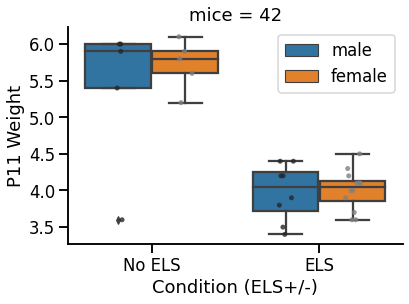

In [45]:
# BW after ELS 
g = sns.boxplot(x="Condition (ELS+/-)", y="P11 Weight", hue="sex", data=data)
gplot = sns.stripplot(x="Condition (ELS+/-)", y="P11 Weight",hue="sex",
              jitter=True,
              dodge=True,
              alpha=.8,
              color='grey',
              edgecolor='k',
              data=data)

# remove redundant legends in Python
# Let us first get legend information from the plot object
handles, labels = gplot.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:2], labels[0:2])
plt.title(f'mice = {num_mice}')
sns.despine()
plt.savefig(join(save_fig_dir, f"NS_P11 weights_male_female_boxplot_{date.today()}.png"), transparent=False,
            dpi=300, bbox_inches="tight")

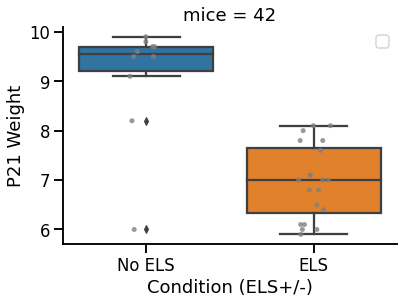

In [46]:
# BW on the weaning day
sns.boxplot(x="Condition (ELS+/-)", y="P21 Weight", data=data)
gplot = sns.stripplot(x="Condition (ELS+/-)", y="P21 Weight",
              jitter=True,
              dodge=True,
              alpha=.8,
              color='grey',
              edgecolor='k',
              data=data)

# remove redundant legends in Python
# Let us first get legend information from the plot object
handles, labels = gplot.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:2], labels[0:2])
plt.title(f'mice = {num_mice}')
sns.despine()
plt.savefig(join(save_fig_dir, f"NS_P21 weights_boxplot_{date.today()}.png"), transparent=False,
            dpi=300, bbox_inches="tight")

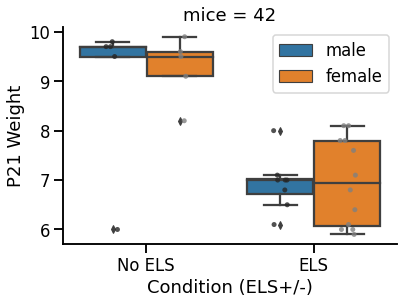

In [47]:
# BW on the weaning day
sns.boxplot(x="Condition (ELS+/-)", y="P21 Weight", hue="sex", data=data)
gplot = sns.stripplot(x="Condition (ELS+/-)", y="P21 Weight",hue="sex",
              jitter=True,
              dodge=True,
              alpha=.8,
              color='grey',
              edgecolor='k',
              data=data)

# remove redundant legends in Python
# Let us first get legend information from the plot object
handles, labels = gplot.get_legend_handles_labels()
# specify just one legend
l = plt.legend(handles[0:2], labels[0:2])
plt.title(f'mice = {num_mice}')
sns.despine()
plt.savefig(join(save_fig_dir, f"NS_P21 weights_male_female_boxplot_{date.today()}.png"), transparent=False,
            dpi=300, bbox_inches="tight")

next steps: 

1.   plot survival rate of ELS vs ctrl mice
2.   Do stats on the groups



In [ ]:
data.head(1)

,id,cage_number,cage_number_updated_11_19,condition,sex,dam,sire,dam geotype,sire genotype,dob,...,p11_weight,p11_date,p21_weight,p21_date,survival status,sefl_weight,sefl_date(20wk),notes,,
1,100971_1,100927,100927,control,male,NaN,NaN,NaN,NaN,10/21/2021,...,6.0,11/1/2021,9.7,11/11/2021,alive,NaN,2/24/2022,Relabelled w/ ear,NaN,NaN
